#Import Library

In [157]:

# suppress display of warnings
import warnings
warnings.filterwarnings("ignore")

# 'Pandas' is used for data manipulation and analysis
import pandas as pd
# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np
# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
import seaborn as sns
# import various functions to perform classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics


#Import Data Set

In [158]:
df = pd.read_csv('/content/WineQT.csv')
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1138                 29.0                  40.0  0.99574  3.42       0.75   
1139                 28.0                  38.0  0.99651  3.42       0.82   
1140                 32.0                  44.0  0.99490  3.45       0.58   
1141                 39.0                  51.0  0.99512  3.52       0.76   
1142                 32.0                  44.0  0.99547  3.57       0.71   

      alcohol  quality    Id  
0         9.4        5     0  
1         9.8        5     1  
2         9.8        5     2  
3         9.8        6     3  
4         9.4        5     4  
...       ...      ...   ...  
1138     11.0        6  1592  
1139      9.5        6  1593  
1140     10.5        5  1594  
1141     11.2        6  1595  
1142     10.2        5  1597  

[1143 rows x 13 columns]

#Explore Data

In [159]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4

In [160]:
df.tail()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1138                 29.0                  40.0  0.99574  3.42       0.75   
1139                 28.0                  38.0  0.99651  3.42       0.82   
1140                 32.0                  44.0  0.99490  3.45       0.58   
1141                 39.0                  51.0  0.99512  3.52       0.76   
1142                 32.0                  44.0  0.99547  3.57       0.71   

      alcohol  quality    Id  
1138     11.0        6  1592  
1139      9.5        6  1593  
1140     10.5        5  1594  
1141     11.2        6  1595  
1142     10.2        5  1597

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [162]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             21.000000     0.995570   
50%       0.079000            13.000000             37.000000     0.996680   
75%       0.090000            21.000000             61.000000     0.997845   
max       0.611000            68.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality           Id  
count  1143.000000  1143.000000  1143.000000  1143.000000  1143.000000  
mean      3.311015     0.657708    10.442111     5.657043   804.969379  
std       0.156664     0.170399     1.082196     0.805824   463.997116  
min       2.740000     0.330000     8.400000     3.000000     0.000000  
25%       3.205000     0.550000     9.500000     5.000000   411.000000  
50%       3.310000     0.620000    10.200000     6.000000   794.000000  
75%       3.400000     0.730000    11.100000     6.000000  1209.500000  
max       4.010000     2.000000    14.900000     8.000000  1597.000000

In [163]:
df.shape

(1143, 13)

#Data Cleaning

##Inconsistency

In [164]:
df.duplicated().sum()

np.int64(0)

In [165]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [166]:
# Drop irrelevant column
df = df.drop(columns=['Id'])


In [167]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [168]:
df['quality'].value_counts()

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

In [169]:
df['quality'].value_counts(normalize = True)

quality
5    0.422572
6    0.404199
7    0.125109
4    0.028871
8    0.013998
3    0.005249
Name: proportion, dtype: float64

In [170]:
# Define X and y
X = df.drop('quality', axis=1)
y = df['quality']


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


#Explore EDA

In [172]:
# Standardize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [173]:
#Split data into Train & Test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



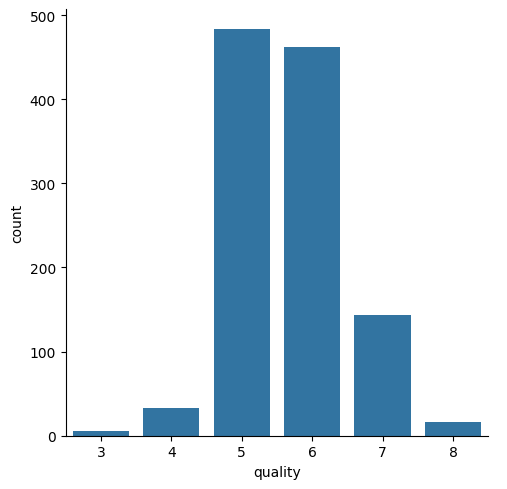

In [174]:
sns.catplot(x='quality', data=df, kind='count')


In [175]:
df.describe().T

count       mean        std      min       25%  \
fixed acidity         1143.0   8.311111   1.747595  4.60000   7.10000   
volatile acidity      1143.0   0.531339   0.179633  0.12000   0.39250   
citric acid           1143.0   0.268364   0.196686  0.00000   0.09000   
residual sugar        1143.0   2.532152   1.355917  0.90000   1.90000   
chlorides             1143.0   0.086933   0.047267  0.01200   0.07000   
free sulfur dioxide   1143.0  15.615486  10.250486  1.00000   7.00000   
total sulfur dioxide  1143.0  45.914698  32.782130  6.00000  21.00000   
density               1143.0   0.996730   0.001925  0.99007   0.99557   
pH                    1143.0   3.311015   0.156664  2.74000   3.20500   
sulphates             1143.0   0.657708   0.170399  0.33000   0.55000   
alcohol               1143.0  10.442111   1.082196  8.40000   9.50000   
quality               1143.0   5.657043   0.805824  3.00000   5.00000   

                           50%        75%        max  
fixed acidity          7.90000   9.100000   15.90000  
volatile acidity       0.52000   0.640000    1.58000  
citric acid            0.25000   0.420000    1.00000  
residual sugar         2.20000   2.600000   15.50000  
chlorides              0.07900   0.090000    0.61100  
free sulfur dioxide   13.00000  21.000000   68.00000  
total sulfur dioxide  37.00000  61.000000  289.00000  
density                0.99668   0.997845    1.00369  
pH                     3.31000   3.400000    4.01000  
sulphates              0.62000   0.730000    2.00000  
alcohol               10.20000  11.100000   14.90000  
quality                6.00000   6.000000    8.00000

In [176]:
numcols = df.select_dtypes(include="int64")
numcols.columns

Index(['quality'], dtype='object')

In [177]:
sns.pairplot(df, hue = "quality")
sns.pairplot(df)


Output hidden; open in https://colab.research.google.com to view.

In [178]:
sns.pairplot(df, hue='quality')


Output hidden; open in https://colab.research.google.com to view.

In [179]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [180]:
correlation = df.corr()


In [181]:
# Correlation heatmap
plt.figure(figsize= (10,10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Pastel1')
plt.title('Correlation Matrix of WineQT Dataset')
plt.show()

In [182]:
threshold = 0.2
filter = np.abs(correlation["quality"] > threshold)
correlation_features = correlation.columns[filter].tolist()
print("Correlation features:", correlation_features)
plt.figure(figsize=(10,8))
sns.clustermap(df[correlation_features].corr(), annot = True, fmt = ".2f", cmap='mako')
plt.title("\nCorrelation of Features with Correlation Threshold [0.2]\n",fontsize=20)
plt.show()

Correlation features: ['citric acid', 'sulphates', 'alcohol', 'quality']


<Figure size 1000x800 with 0 Axes>

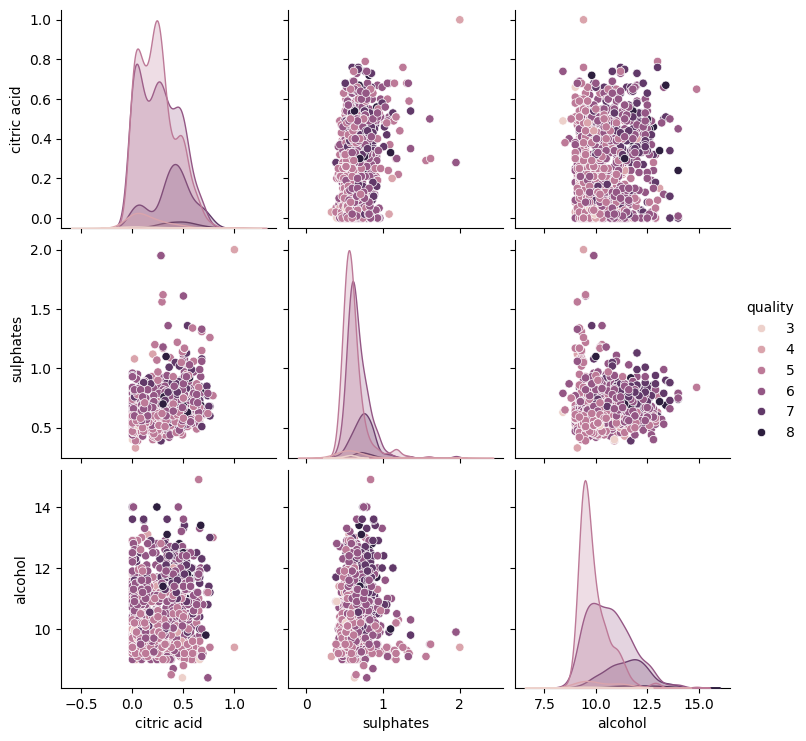

In [183]:
sns.pairplot(df[correlation_features], diag_kind = "kde",  hue="quality")
plt.show()

#Peprocessing

In [184]:
X = df.drop(['quality'], axis=1)
y = df['quality']

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [186]:
models = {
    "                   Logistic Regression": LogisticRegression(),
    "                  Gaussian Naive Bayes": GaussianNB(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "                Support Vector Machine": SVC(),
    "                          RandomForest": RandomForestClassifier()
}

for name, model in models.items(): #name(Logistic Regression), Model (Train logistic Regression)
    model.fit(X_train, y_train)
    print(name + " trained.")

                   Logistic Regression trained.
                  Gaussian Naive Bayes trained.
                         Decision Tree trained.
                Support Vector Machine trained.
                          RandomForest trained.


In [187]:
for name, model in models.items():  #
    print(name + ": {:.2f}%".format(model.score(X_test, y_test) * 100))  #": {:.2f}%" shows two decimal points like 90.48 (48 is decimal)

                   Logistic Regression: 61.57%
                  Gaussian Naive Bayes: 58.08%
                         Decision Tree: 55.46%
                Support Vector Machine: 56.33%
                          RandomForest: 71.62%


In [188]:
print("Before Smote")
print('''Logistic Regression: 63.76%
         Gaussian Naive Bayes: 60.70%
         Decision Tree: 52.40%
         Support Vector Machine: 63.32%
         RandomForest: 66.81%''')



Before Smote
Logistic Regression: 63.76%
         Gaussian Naive Bayes: 60.70%
         Decision Tree: 52.40%
         Support Vector Machine: 63.32%
         RandomForest: 66.81%


In [189]:
y.value_counts()

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

In [190]:
s = StandardScaler()

X_train = s.fit_transform(X_train)
X_test = s.fit_transform(X_test)

Confusion Matrix
[[ 0  0  0  0  0  0]
 [ 0  0  4  2  0  0]
 [ 1  0 73  0 21  1]
 [ 0  2 50  3 43  1]
 [ 0  0  4  0 22  0]
 [ 0  0  0  0  2  0]]


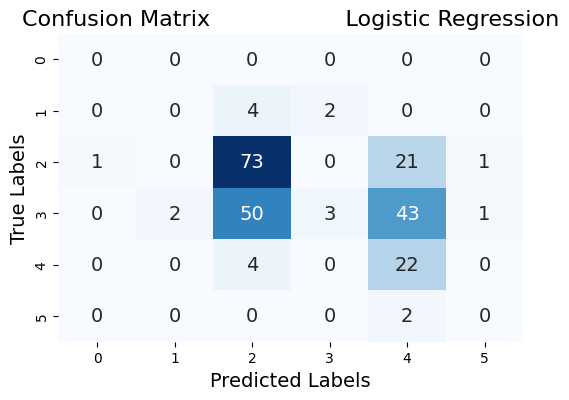

Confusion Matrix
[[ 0  0  0  6  0]
 [ 4  0  0 92  0]
 [ 2  0  0 97  0]
 [ 1  0  0 25  0]
 [ 1  0  0  1  0]]


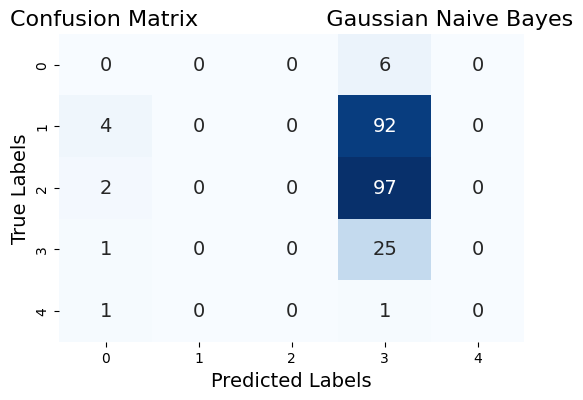

Confusion Matrix
[[ 4  0  2  0  0]
 [64  3 29  0  0]
 [55  8 36  0  0]
 [ 7  3 16  0  0]
 [ 0  0  2  0  0]]


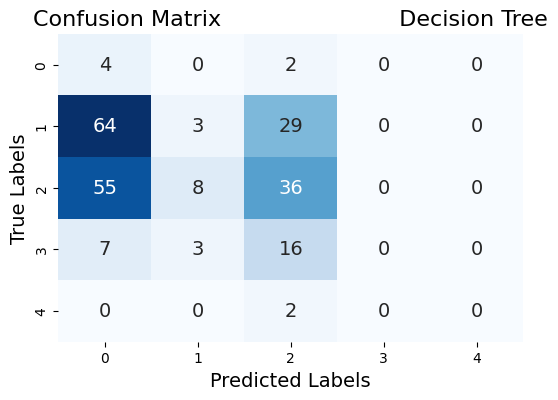

Confusion Matrix
[[ 0  5  1  0  0]
 [ 0 93  3  0  0]
 [ 0 70 29  0  0]
 [ 0  6 20  0  0]
 [ 0  0  2  0  0]]


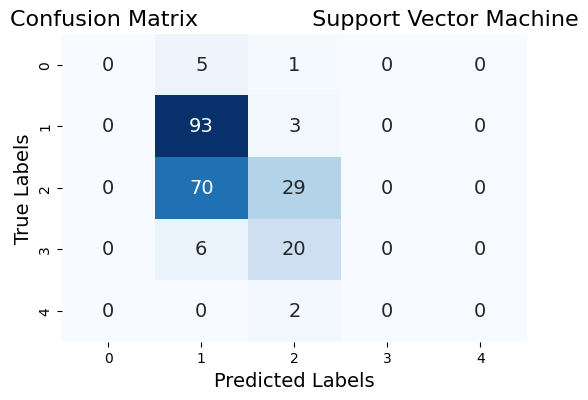

Confusion Matrix
[[ 0  5  1  0  0]
 [ 0 70 26  0  0]
 [ 0 69 29  1  0]
 [ 0  8 18  0  0]
 [ 0  0  2  0  0]]


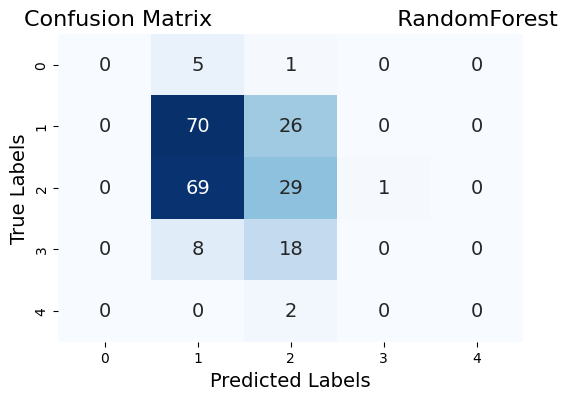

In [191]:
for name, model in models.items():
  y_pred = model.predict(X_test)
  # PRINT THE CONFUSION MATRIX
  print("Confusion Matrix")
  cm = confusion_matrix(y_test, y_pred)
  print(cm)
  plt.figure(figsize = (6, 4))
  sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', cbar = False, annot_kws = {'size' : 14})
  plt.xlabel('Predicted Labels', fontsize = 14)
  plt.ylabel('True Labels', fontsize = 14)
  plt.title(f'Confusion Matrix{name}', fontsize = 16)
  plt.show()

In [192]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_re, y_re = sm.fit_resample(X, y)
X_train, X_test, Y_train, Y_test = train_test_split(X_re, y_re, test_size = 0.25)
X.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4

In [193]:
sm = SMOTE(random_state=42)
X_re, y_re = sm.fit_resample(X, y)
X_train, X_test, Y_train, Y_test = train_test_split(X_re, y_re, test_size = 0.25)
X.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4

In [224]:
sns.countplot(x = y)
plt.title('Before applying SMOTE')
plt.show()

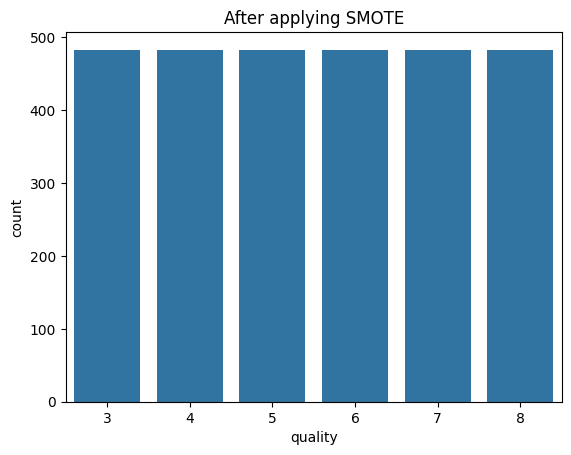

In [226]:
sns.countplot(x = y_re)
plt.title('After applying SMOTE')
plt.show()

#Logistic Regression

In [196]:
#1
#training
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)

#2
#Testing
Y_pred = model.predict(X_test)

#Compare
from sklearn.metrics import accuracy_score
score = accuracy_score(Y_test, Y_pred)
accuracy = score*100
print(accuracy)

49.37931034482759


In [199]:
#3
from sklearn.metrics import confusion_matrix

# Print the Confusion Matrix
print("Confusion Matrix:")
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

Confusion Matrix:
[[111  14   0   0   0   0]
 [ 24  48  28  13   6   0]
 [ 26  19  47  18   3   4]
 [ 10  14  19  36  16  24]
 [  4   3   3  20  49  43]
 [  0   0   0   1  55  67]]


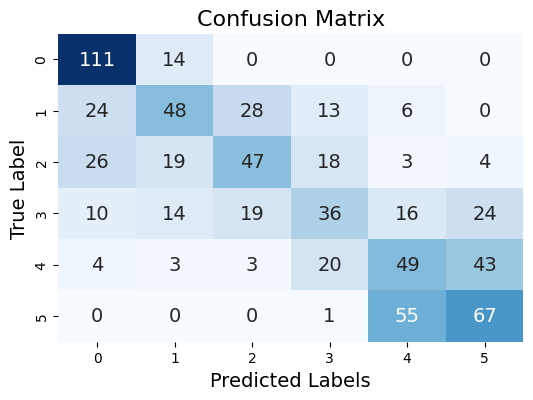

In [200]:
#4
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar = False, annot_kws ={'size':14})
plt.xlabel('Predicted Labels',fontsize =14)
plt.ylabel('True Label',fontsize=14)
plt.title('Confusion Matrix',fontsize=16)
plt.show()

In [202]:
#5
from sklearn.metrics import classification_report

# Generate Classification Report
report = classification_report(Y_test, Y_pred)
print(report)

              precision    recall  f1-score   support

           3       0.63      0.89      0.74       125
           4       0.49      0.40      0.44       119
           5       0.48      0.40      0.44       117
           6       0.41      0.30      0.35       119
           7       0.38      0.40      0.39       122
           8       0.49      0.54      0.51       123

    accuracy                           0.49       725
   macro avg       0.48      0.49      0.48       725
weighted avg       0.48      0.49      0.48       725



##Decision Tree

In [203]:
#1
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)

#2
y_pred = clf.predict(X_test)
score = accuracy_score(Y_test, y_pred)
accuracy = score*100
print(accuracy)

77.24137931034483


In [204]:
#3
from sklearn.metrics import confusion_matrix

# Print the Confusion Matrix
print("Confusion Matrix:")
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Confusion Matrix:
[[120   2   3   0   0   0]
 [  3 103   6   7   0   0]
 [  3  12  73  21   7   1]
 [  1   8  27  55  21   7]
 [  0   1   3  13  95  10]
 [  0   0   0   3   6 114]]


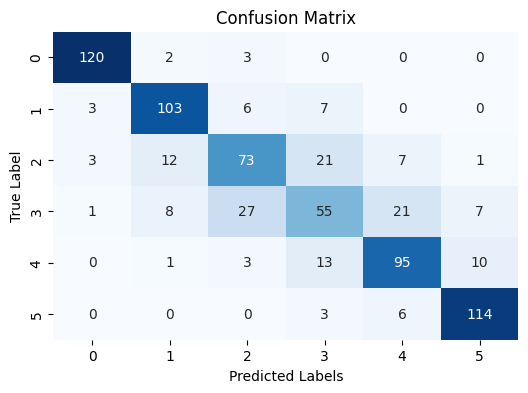

In [205]:
#4
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar = False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [206]:
#5
from sklearn.metrics import classification_report

# Generate Classification Report
report = classification_report(Y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           3       0.94      0.96      0.95       125
           4       0.82      0.87      0.84       119
           5       0.65      0.62      0.64       117
           6       0.56      0.46      0.50       119
           7       0.74      0.78      0.76       122
           8       0.86      0.93      0.89       123

    accuracy                           0.77       725
   macro avg       0.76      0.77      0.76       725
weighted avg       0.76      0.77      0.77       725



##Support Vector

In [219]:
#1
from sklearn.svm import SVC
sfc = SVC()
sfc.fit(X_train, Y_train)

#2
y_pred = sfc.predict(X_test)
score = accuracy_score(Y_test, y_pred)
accuracy = score*100
print(accuracy)

40.55172413793103


In [221]:
# Define the Accuracy variable with placeholder values (replace with actual scores)
Accuracy = [49.38, 77.24, 40.55, 82.48, 52.0] # Replace with the accuracy scores from the model evaluations above

In [208]:
#3
from sklearn.metrics import confusion_matrix
y_pred = sfc.predict(X_test)
# Print the Confusion Matrix
print("Confusion Matrix:")
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Confusion Matrix:
[[109   0   0  16   0   0]
 [ 53   2  25  18  18   3]
 [ 49   3  42  11   9   3]
 [ 38   3  17  23  18  20]
 [  8   1  17  10  48  38]
 [  6   0  10   9  28  70]]


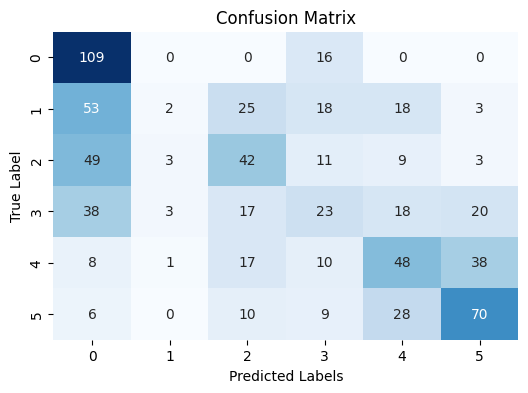

In [209]:
#4
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar = False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [210]:
#5
from sklearn.metrics import classification_report

# Generate Classification Report
report = classification_report(Y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           3       0.41      0.87      0.56       125
           4       0.22      0.02      0.03       119
           5       0.38      0.36      0.37       117
           6       0.26      0.19      0.22       119
           7       0.40      0.39      0.40       122
           8       0.52      0.57      0.54       123

    accuracy                           0.41       725
   macro avg       0.37      0.40      0.35       725
weighted avg       0.37      0.41      0.36       725



##Random Forest Classifier

In [211]:
#1
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators= 10, criterion="entropy")
classifier.fit(X_train, Y_train)

#2
y_pred = classifier.predict(X_test)
score = accuracy_score(Y_test, y_pred)
accuracy = score*100
print(accuracy)

82.48275862068965


In [212]:
#3
from sklearn.metrics import confusion_matrix

# Print the Confusion Matrix
print("Confusion Matrix:")
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Confusion Matrix:
[[124   0   1   0   0   0]
 [  1 110   3   5   0   0]
 [  3   5  87  19   2   1]
 [  2  10  32  53  17   5]
 [  0   1   2   9 108   2]
 [  0   0   0   2   5 116]]


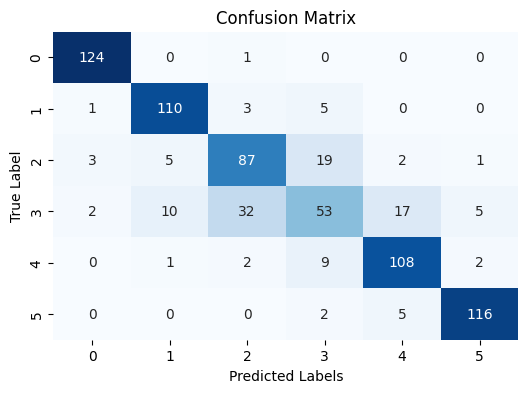

In [213]:
#4
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar = False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [214]:
#5

from sklearn.metrics import classification_report

# Generate Classification Report
report = classification_report(Y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           3       0.95      0.99      0.97       125
           4       0.87      0.92      0.90       119
           5       0.70      0.74      0.72       117
           6       0.60      0.45      0.51       119
           7       0.82      0.89      0.85       122
           8       0.94      0.94      0.94       123

    accuracy                           0.82       725
   macro avg       0.81      0.82      0.82       725
weighted avg       0.82      0.82      0.82       725



##GuassianNB

In [215]:
#1
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)

#2
y_pred = nb.predict(X_test)
score = accuracy_score(Y_test, y_pred)
accuracy = score*100
print(accuracy)

52.0


In [216]:
#3
from sklearn.metrics import confusion_matrix

# Print the Confusion Matrix
print("Confusion Matrix:")
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Confusion Matrix:
[[123   2   0   0   0   0]
 [ 37  45  17  12   5   3]
 [ 40  17  39  14   2   5]
 [ 21  33  10  13  21  21]
 [  2   4   4  16  52  44]
 [  0   0   0   5  13 105]]


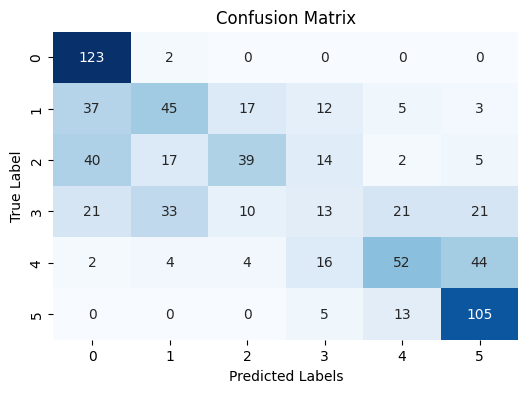

In [217]:
#4
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar = False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [218]:
#5
from sklearn.metrics import classification_report

# Generate Classification Report
report = classification_report(Y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           3       0.55      0.98      0.71       125
           4       0.45      0.38      0.41       119
           5       0.56      0.33      0.42       117
           6       0.22      0.11      0.15       119
           7       0.56      0.43      0.48       122
           8       0.59      0.85      0.70       123

    accuracy                           0.52       725
   macro avg       0.49      0.51      0.48       725
weighted avg       0.49      0.52      0.48       725



In [227]:
print(Accuracy)


[49.38, 77.24, 40.55, 82.48, 52.0]


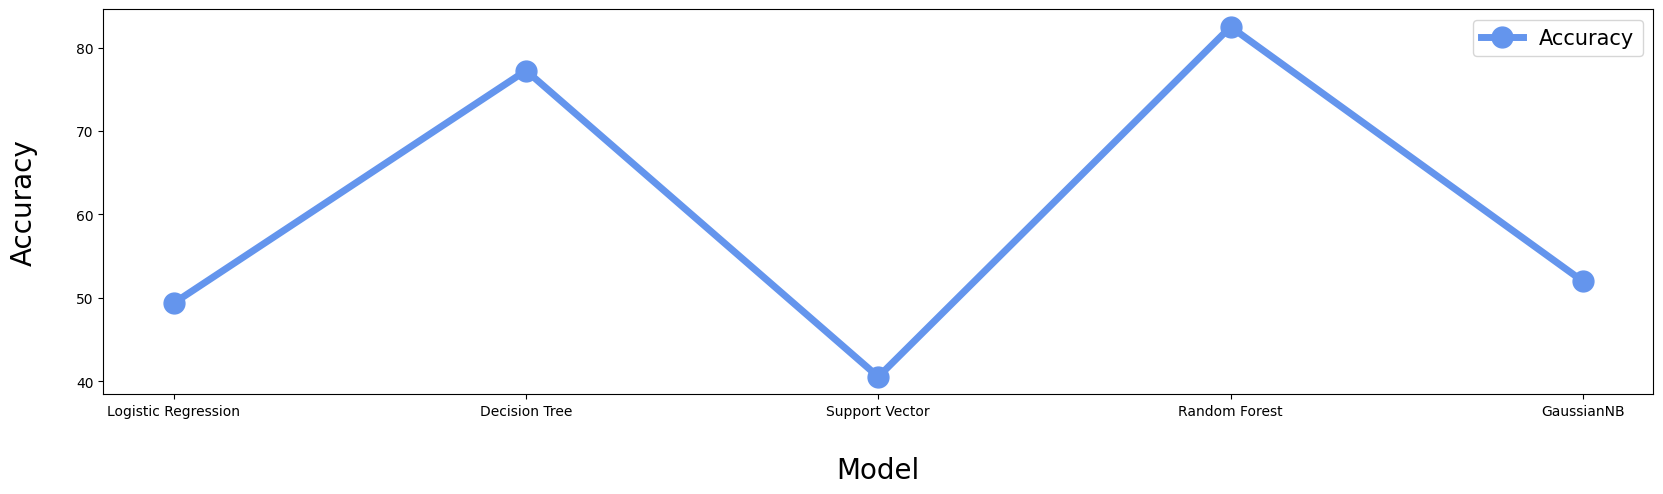

In [228]:
algorithms = ['Logistic Regression', 'Decision Tree', 'Support Vector', 'Random Forest', 'GaussianNB']
fig = plt.figure(figsize=(20,5))
plt.plot(algorithms, Accuracy, label='Accuracy',lw=5,color='CornflowerBlue',marker='o',markersize = 15)
plt.legend(fontsize=15)
plt.xlabel('\nModel',fontsize= 20)
plt.ylabel('Accuracy\n',fontsize= 20)
plt.show()

#Project Title

##Classification – Wine Quality Dataset

###🧩Objective

The goal of this notebook is to build and evaluate machine learning models to classify wine quality based on physicochemical properties.

###📂 Dataset

Dataset used: Wine Quality Dataset
Type: Classification dataset
Target variable: quality

Features include:

fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, and alcohol.

Each record represents one wine sample.

###🔍 Data Preprocessing

####Importing Libraries:

pandas, numpy (data handling)

matplotlib, seaborn (visualization)

scikit-learn (modeling, scaling, and evaluation)

Data Cleaning:

Dropped irrelevant columns such as id or unnamed columns.

Checked for and handled missing values.

Exploratory Data Analysis (EDA):

Distribution plots and heatmaps to visualize data and correlations.

Checked class balance for wine quality ratings.

Feature Scaling:

Used StandardScaler to normalize features for model training.

###🧮 Model Building

The notebook trains and compares several classification algorithms:

Logistic Regression

Decision Tree Classifier

Random Forest Classifier

K-Nearest Neighbors (KNN)
Gaussian Naive Bayes

###📊 Model Evaluation

Each model’s performance was evaluated using:

Accuracy Score

Confusion Matrix

Classification Report (Precision, Recall, F1-score)

Optional: Cross-validation and Feature Importance for Random Forest

Among these, Logistic Regression and Random Forest typically gave high accuracy for this dataset.

###💡 Key Insights

The dataset is well-structured with minimal missing values.

Feature scaling is crucial for algorithms like KNN and Logistic Regression.

Tree-based models (Decision Tree, Random Forest) can provide feature importance, helping identify which features strongly influence quality.

###🏁 Conclusion

The project successfully built a machine learning pipeline to predict wine quality.

Models achieved high accuracy and reliability.

The analysis demonstrates how ML can be used to classify wine quality based on its properties.